In [1]:
import pandas as pd
import numpy as np   
import matplotlib.pyplot as plt
import seaborn as sns
#importing required libereries
sns.set_theme(style='whitegrid')
%matplotlib inline
df=pd.read_csv("Clean_Dataset.csv")    #loading data present in the same folder
df.head()


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [2]:
df.info()
df.describe()
df.columns
df.isnull().sum()
#data checking 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

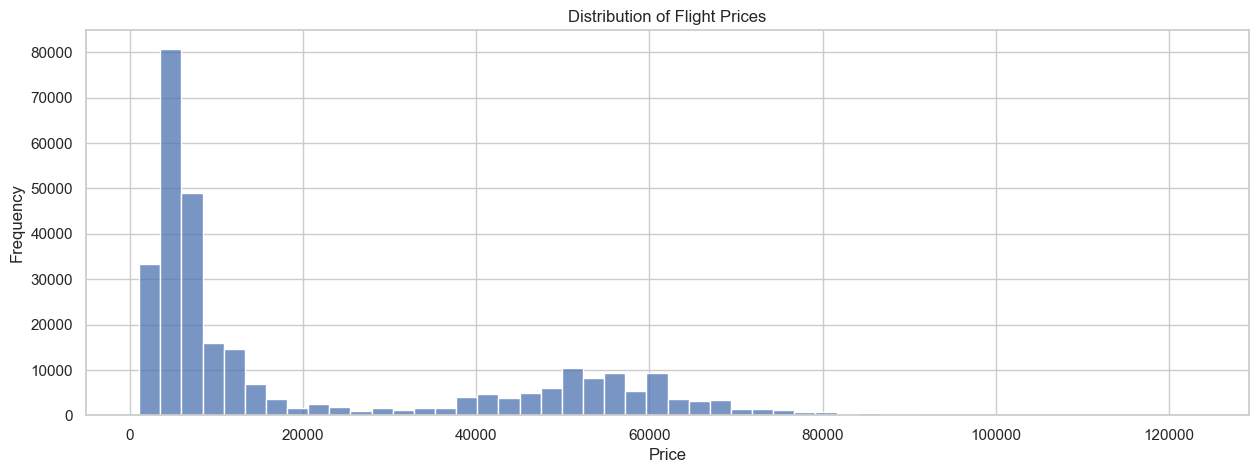

In [3]:
plt.figure(figsize=(15,5))
sns.histplot(df['price'], bins=50)
plt.title("Distribution of Flight Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()
#ploting basic graphs for information 


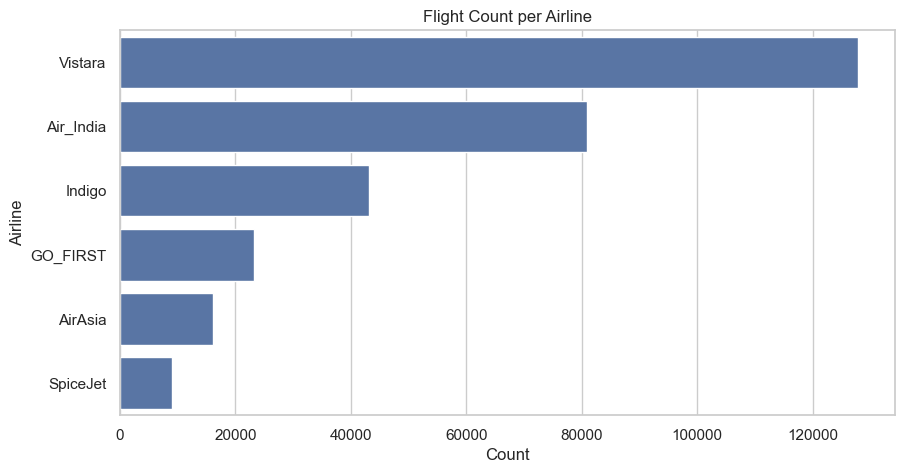

In [4]:
plt.figure(figsize=(10,5))
sns.countplot(y='airline', data=df, order=df['airline'].value_counts().index)
plt.title("Flight Count per Airline")
plt.xlabel("Count")
plt.ylabel("Airline")
plt.show()
#ploting graphs for understanding datsset


df["class"]=df["class"].replace({
    'Economy':1,
    'Business':0
})
#changing "Economy" "Business" to 1 and 0 making it easy for model to understad 


df["departure_time"]=df["departure_time"].replace({
    'Early_Morning':0,
    'Morning':1,
    'Afternoon':2,
    'Evening':3,
    'Night':4,
    'Late_Night':
})
#changing timings to integer line 0,1,2.... making easy for model



from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Fit and transform
df['source_city_encoded'] = le.fit_transform(df['source_city'])
# Print the mapping
for i, city in enumerate(le.classes_):
    print(f"{city} → {i}")
"""Bangalore → 0
Chennai → 1
Delhi → 2
Hyderabad → 3
Kolkata → 4
Mumbai → 5"""

# source_city	departure_time	stops	arrival_time	destination_city	class	duration	days_left	price
# features=['source_city','destination_city','class','duration','days_left','departure_time']
# x=pd.get_dummies(df[features], drop_first=True)
# y=df['price']
# x_array=np.array(x)
# y_array=np.array(y)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['source_city'] = le.fit_transform(df['source_city'])
df['destination_city'] = le.fit_transform(df['destination_city'])
df['class'] = le.fit_transform(df['class'])
df['departure_time'] = le.fit_transform(df['departure_time'])
features = ['source_city', 'destination_city', 'class', 'duration', 'days_left', 'departure_time']
X = df[features]
y = df['price']
x_array = np.array(X)
y_array = np.array(y)
# y = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + w6x6


In [54]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset
df = pd.read_csv("Clean_Dataset.csv")

# Label encoding for categorical columns
categorical_cols = ['source_city', 'destination_city', 'class', 'departure_time']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoder for possible inverse_transform later
    print(f"Label encoding for '{col}':")
    for i, val in enumerate(le.classes_):
        print(f"{val} → {i}")
    print()

# Select features and target
features = ['source_city', 'destination_city', 'class', 'duration', 'days_left', 'departure_time']
X = df[features]
y = df['price']

# Convert to numpy arrays
x_array = np.array(X)
y_array = np.array(y)

# Standardize features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_array)

print("✅ Data is encoded and scaled!")
print("x_scaled shape:", x_scaled.shape)
print("y_array shape:", y_array.shape)
print("Sample x_scaled:\n", x_scaled[:5])
print("Sample y:\n", y_array[:5])


Label encoding for 'source_city':
Bangalore → 0
Chennai → 1
Delhi → 2
Hyderabad → 3
Kolkata → 4
Mumbai → 5

Label encoding for 'destination_city':
Bangalore → 0
Chennai → 1
Delhi → 2
Hyderabad → 3
Kolkata → 4
Mumbai → 5

Label encoding for 'class':
Business → 0
Economy → 1

Label encoding for 'departure_time':
Afternoon → 0
Early_Morning → 1
Evening → 2
Late_Night → 3
Morning → 4
Night → 5

✅ Data is encoded and scaled!
x_scaled shape: (300153, 6)
y_array shape: (300153,)
Sample x_scaled:
 [[-0.32972125  1.3824254   0.67257558 -1.39753079 -1.84387477 -0.23789746]
 [-0.32972125  1.3824254   0.67257558 -1.3752838  -1.84387477 -0.80793408]
 [-0.32972125  1.3824254   0.67257558 -1.39753079 -1.84387477 -0.80793408]
 [-0.32972125  1.3824254   0.67257558 -1.38640729 -1.84387477  0.90217577]
 [-0.32972125  1.3824254   0.67257558 -1.3752838  -1.84387477  0.90217577]]
Sample y:
 [5953 5953 5956 5955 5955]


In [55]:
def calc_cost(x,y,w,b):
    # Calculate the cost function
    m=x.shape[0]
    total_cost=0
    cost=0
    for i in range(m):
        fx=0
        fx=np.dot(w,x[i])+b
        cost+=(fx-y[i])**2
    total_cost=cost/(2*m)
    return total_cost


In [56]:
i_w=[0.1,0.1,0.1,0.1,0.1,0.1]
init_w=np.array(i_w)
init_b=0
x=calc_cost(x_array,y_array,init_w,init_b)
print("cost :",x)
# checking cost for some random values of w and b 


cost : 475685514.8672656


The expected value for this value of w and b should be 475686827.4259583. If then its correct because of the random values of w and b 

In [57]:
# def calc_gradient(x,y,w,b):
#     m=x.shape[0]
#     cost_w=cost_b=0
#     dw=np.zeros_like(w)
#     db=0
#     for i in range(m):
#         fx=0
#         fx=np.dot(w,x[i])+b
#         error=fx-y[i]
#         cost_b+=error*x[i]
#         cost_w+=error
#     dw=cost_w/m
#     db=cost_b/m
#     return dw,db
def calc_gradient(x, y, w, b):
    m = x.shape[0]
    fx = np.dot(x, w) + b        
    error = fx - y               
    dw = np.dot(x.T, error) / m 
    db = np.sum(error) / m     
    return dw, db

# gradient function calulating dj/dw and dj/db using that in geadient desent 
        

In [58]:
i_w=[0.1,0.1,0.1,0.1,0.1,0.1]
init_w=np.array(i_w)
init_b=0
grd_w, grd_b=calc_gradient(x_array,y_array,init_w,init_b)
print(grd_w,"\n",grd_b)

[ -54015.47960713  -54246.38548206   -4522.1103795  -288568.90138607
 -514789.43305349  -52807.84498189] 
 -20885.0107691544


In [59]:
import math
def gradient_desent(x,y,w,b,calc_gradient,calc_cost,alpha,iterations):
    w_in=w
    b_in=b
    cost_his=[]
    for i in range(iterations):
        dw, db=calc_gradient(x,y,w_in,b_in)
        w_in=w_in-(alpha*dw)
        b_in=b_in-(alpha*db)
        if i % 10 == 0:
            print(f"dw: {dw}, db: {db}")
        cost=calc_cost(x,y,w_in,b_in)
        cost_his.append(cost)
        if i % max(1, iterations // 10) == 0:
            print(f"Iteration {i}: Cost {cost:.4f}")
    return w_in,b_in,cost_his
    

dw: [ -104.28412619  -108.83589971 21287.29999305 -4635.38407458
  2087.02291627 -1323.70281433], db: -20889.660523133203
Iteration 0: Cost 466658501.9174
dw: [  -93.03935949  -102.13692234 19186.36742859 -3905.68010362
  1845.80925171 -1058.71155544], db: -18892.23453014071
Iteration 10: Cost 385144311.1182
dw: [  -83.24615126   -95.73451825 17296.91840978 -3275.1480174
  1632.75822891  -834.80811419], db: -17085.798265921647
Iteration 20: Cost 318925430.3581
dw: [  -74.70483247   -89.63757212 15597.26514602 -2731.22416024
  1444.57024542  -646.28112845], db: -15452.089688916052
Iteration 30: Cost 265103880.7142
dw: [  -67.24323706   -83.84962683 14067.98193719 -2262.8748705
  1278.33215317  -488.1665004 ], db: -13974.592936084053
Iteration 40: Cost 221336092.7053
dw: [  -60.71298451   -78.36996546 12691.66567309 -1860.41461002
  1131.47210292  -356.15328136], db: -12638.371356939077
Iteration 50: Cost 185725826.2484
dw: [  -54.98625397   -73.19451612 11452.72201898 -1515.34537874
  1

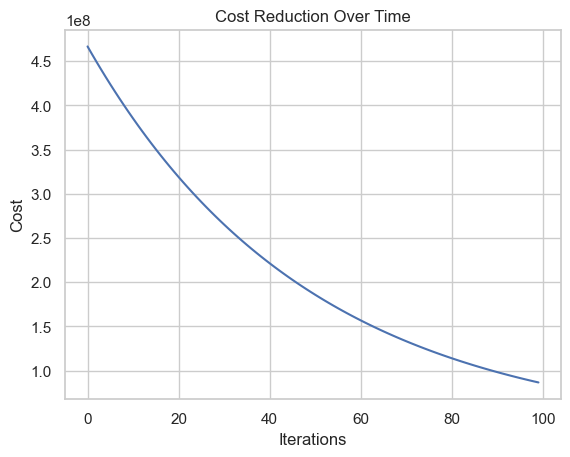

In [ ]:
i_w=[0,0,0,0,0,0]
init_w=np.array(i_w)
init_b=0
alpha=0.01
itera=1000
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_array)

fin_w, fin_b, cost_history=gradient_desent(x_scaled,y_array,init_w,init_b,calc_gradient,calc_cost,alpha,itera)
print(fin_w,"\n")


plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Reduction Over Time")
plt.grid(True)
plt.show()

